In [1]:
import sqlite3
sys.path.append('c:/users/cschiff/Documents/GitHub/PAD/')
import Scraper

In [2]:
obs        = 'mms1'
instrument = 'fpi'
mode       = 'brst'
descriptor = 'des-debug'
ver        = '3.1.1'
pattern    = Scraper.construct_file_selector(obs,instrument,mode,descriptor,ver)

encoding a search for mms1_fpi_brst_l2_des-debug_\d{14}_v3.1.1.cdf!


In [3]:
base_dir = 'x:/data/ftp/%s/%s/%s/l2/%s' % (obs,instrument,mode,descriptor)
print base_dir
debug_list = Scraper.scrape_files(pattern,base_dir)

x:/data/ftp/mms1/fpi/brst/l2/des-debug


In [4]:
print len(debug_list)
debug_list[1]

728


'x:/data/ftp/mms1/fpi/brst/l2/des-debug/2015/11/14/mms1_fpi_brst_l2_des-debug_20151114125204_v3.1.1.cdf'

In [5]:
instrument = 'mec'
mode       = 'srvy'
descriptor = 'epht89d'
ver        = '2.1.0'
pattern    = Scraper.construct_file_selector(obs,instrument,mode,descriptor,ver)

encoding a search for mms1_mec_srvy_l2_epht89d_\d{8}_v2.1.0.cdf!


In [6]:
base_dir = 'x:/data/ftp/%s/%s/%s/l2/%s' % (obs,instrument,mode,descriptor)
print base_dir
mec_list = Scraper.scrape_files(pattern,base_dir)

x:/data/ftp/mms1/mec/srvy/l2/epht89d


In [7]:
print len(mec_list)

396


In [9]:
def round_time(epoch, date_delta=dt.timedelta(minutes=1), to='average'):
    """
    Purpose:      Round a datetime object to a multiple of a timedelta
    epoch:        datetime.datetime object, no default
    dateDelta:    timedelta object, we round to a multiple of this, 
                  default 1 minute.
    Adapted from: http://stackoverflow.com/questions/3463930/
                  how-to-round-the-minute-of-a-datetime-object-python
    """
    round_to = date_delta.total_seconds()

    if epoch is None:
        epoch = dt.datetime.now()
    seconds = (epoch - epoch.min).seconds

    if to == 'up':
        # // is a floor division
        rounding = (seconds + round_to) // round_to * round_to
    elif to == 'down':
        rounding = seconds // round_to * round_to
    else:
        rounding = (seconds + round_to / 2) // round_to * round_to

    return epoch + dt.timedelta(0, rounding - seconds, -epoch.microsecond)

In [19]:
def quiet_axis(ax):
    ax.set_axis_bgcolor('none')
    ax.tick_params(labelcolor='none',top='off',bottom='off',left='off',right='off')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')

In [2]:
class line():
    def __init__(self,ax,x,y):
        self.ax                  = ax
        self.line                = self.ax.plot(x,y)[0]
        self.line.set_color('blue')
        self.line.set_label('')
        self.line.set_linestyle('-')
        self.line.set_linewidth(2)
        self.line.set_marker('None')
        self.line.set_markersize(10)
    def color(self,col):
        self.line.set_color(col)
    def label(self,lab):
        self.line.set_label(lab)
    def linestyle(self,lstyle):
        self.line.set_linestyle(lstyle)
    def linewidth(self,lwidth):
        self.line.set_linewidth(lwidth)
    def marker(self,mark):
        self.line.set_marker(mark)
    def markersize(self,marksize):
        self.line.set_markersize(marksize)

In [3]:
class curves():
    def __init__(self,ax,x,y):
        self.ax    = ax
        self.lines = [line(ax,x,y)]
    def add_line(self,x,y):
        self.lines.append(line(self.ax,x,y))
    def customize_line(self,index,line_parms):
        self.lines[index].color(line_parms['color'])
        self.lines[index].label(line_parms['label'])
    def customize_ax(self,ax_parms):
        self.ax.set_xlabel(ax_parms['xlabel'])
        if len(ax_parms['xlim']) == 2:
            self.ax.set_xlim  (ax_parms['xlim'])
        if ax_parms['xscale'] != '':
            self.ax.set_xscale(ax_parms['xscale'])
        self.ax.set_ylabel(ax_parms['ylabel'])
        if len(ax_parms['ylim']) == 2:        
            self.ax.set_ylim  (ax_parms['ylim'])
        if ax_parms['yscale'] != '':            
            self.ax.set_yscale(ax_parms['yscale'])
        if ax_parms['loc'] != '':
            self.ax.legend(loc=ax_parms['loc'])        

In [ ]:
class traces():
    def __init__(self,ax,x,y):
        self.ax    = ax
        self.lines = [line(ax,x,y)]
    def add_line(self,x,y):
        self.lines.append(line(self.ax,x,y))
    def customize_line(self,index,line_parms):
        self.lines[index].color(line_parms['color'])
        self.lines[index].label(line_parms['label'])
    def format_ax_time(self.ax,parms):
        self.ax.xaxis.set_major_locator(parms['time_location'])
        self.ax.xaxis.set_major_formatter(parms['time_format'])
    def set_time_xlims(t,t_delta):
        t0 = round_time(t[0], date_delta=t_delta,to='down')
        tf = round_time(t[-1],date_delta=t_delta,to='up')
        return [t0,tf]        
    def customize_ax(self,ax_parms):
        self.ax.set_xlabel(ax_parms['xlabel'])
        if len(ax_parms['xlim']) == 2:
            self.ax.set_xlim  (ax_parms['xlim'])
        self.ax.set_xscale('linear')
        self.ax.set_ylabel(ax_parms['ylabel'])
        if len(ax_parms['ylim']) == 2:        
            self.ax.set_ylim  (ax_parms['ylim'])
        if ax_parms['yscale'] != '':            
            self.ax.set_yscale(ax_parms['yscale'])
        if ax_parms['loc'] != '':
            self.ax.legend(loc=ax_parms['loc'])            

In [10]:
def cbar_position(current_ax,offset,cbar_width):
    #get the tuple describing the lower x,y corner position
    #and the width and height
    x_pos, y_pos, width, height = current_ax.get_position().bounds
    return [x_pos + width + offset, y_pos, cbar_width, height] 

In [20]:
def add_info_box(fig,date,geometry):
    dax = fig.add_axes(geometry)
    quiet_axis(dax)
    string = 'hh:mm\nX-GSM (Re)\nY-GSM (Re)\nZ-GSM (Re)\n%s' % date
    dax.annotate(string,xy=(0.5,0.5))

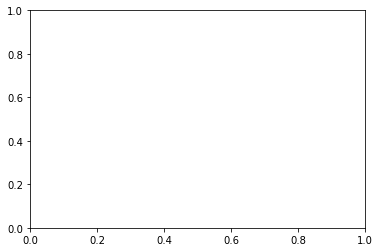

In [4]:
fig1 = plt.figure()
ax1  = fig1.add_subplot(1,1,1)

In [5]:
c1 = curves(ax1,x,y)
c1.add_line(x,z)
c1.add_line(x,a)
c1.customize_line(0,{'color':'red'  ,'label':'x^2'})
c1.customize_line(1,{'color':'green','label':'x^3'})
c1.customize_line(2,{'color':'blue' ,'label':'sin(x)'})
c1.customize_ax({'loc':'best','xlabel':'x','xscale':'','xlim':[],'ylabel':'f(x)','ylim':'','yscale':''})

In [14]:
fig1.savefig('test.png')

In [13]:
c1.ax.set_yscale('linear')
c1.ax.set_xscale('linear')

In [15]:
q = ax1.get_xmajorticklabels()

In [16]:
print q

<a list of 7 Text xticklabel objects>


In [18]:
for qq in q:
    print qq.get_text()

0.0
0.0
0.2
0.4
0.6
0.8



In [21]:
pwd

u'C:\\Users\\cschiff'